# Zomato Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Creating Data frame

In [2]:
df = pd.read_csv("Zomato data .csv")
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


Convert tha dtype of Rate column

In [3]:
def handleRate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)

df['rate'] = df['rate'].apply(handleRate)
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


# What type of resturant do the majority of customers order from

Text(0.5, 0, 'Type of resturant')

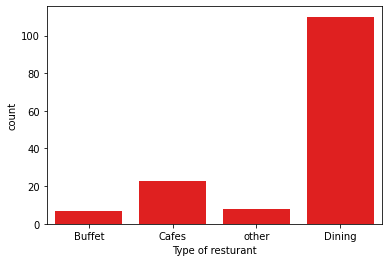

In [7]:
sns.countplot(x=df['listed_in(type)'],color="red")
plt.xlabel("Type of resturant")

# How many votes has each type of resturant received from customers

Text(0, 0.5, 'Votes')

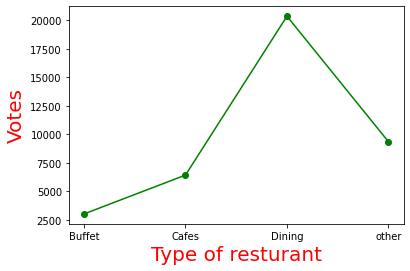

In [11]:
group_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes':group_data})
plt.plot(result, c="green", marker = "o")
plt.xlabel("Type of resturant" ,c = "red", size = 20)
plt.ylabel("Votes", c="red",size= 20)

conclusion:- Dining resturant has received max votes

# What are the rating that the majority of the resturant has received

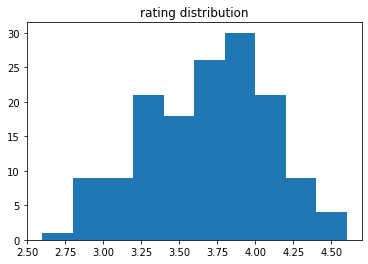

In [12]:
plt.hist(df['rate'],bins=10)
plt.title("rating distribution")
plt.show()

conclusion: - max rating is between 3.5 to 4

# Which mode(online or offline) has received the maximum rating

<AxesSubplot: xlabel='online_order', ylabel='rate'>

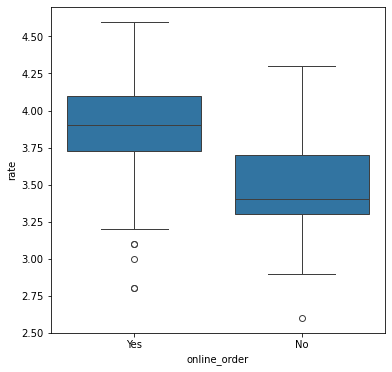

In [18]:
plt.figure(figsize=(6,6))
sns.boxplot(x = "online_order", y = "rate" , data = df)

conclusion:- Online mode got more ratings

# Which type of resturant received more offline orders, so that zomato can provide customers with some good offers

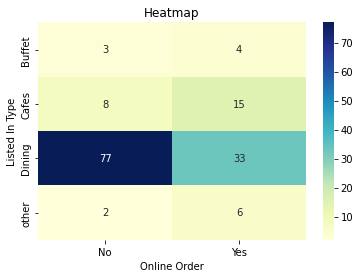

In [21]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size',fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In Type")
plt.show()